In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- 1. Data Loading ---
print("--- 1. Data Loading ---")
# Load the owid-covid-data.csv file
df = pd.read_csv('owid-covid-data.csv')
print("Data loaded successfully.")
print(f"Number of rows: {len(df)}, Number of columns: {len(df.columns)}")
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

--- 1. Data Loading ---
Data loaded successfully.
Number of rows: 429435, Number of columns: 67

First 5 rows of the DataFrame:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0 

In [3]:
# --- 2. Data Cleaning and Filtering ---
print("\n--- 2. Data Cleaning and Filtering ---")
# Filter for countries of interest (Kenya, USA, India, World)
countries_of_interest = ['Kenya', 'United States', 'India', 'World']
df_filtered = df[df['location'].isin(countries_of_interest)].copy()
print(f"Filtered data for: {countries_of_interest}")



--- 2. Data Cleaning and Filtering ---
Filtered data for: ['Kenya', 'United States', 'India', 'World']


In [4]:
# Convert the 'date' column to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
print("Converted 'date' column to datetime.")

Converted 'date' column to datetime.


In [5]:
# Fill missing numeric values in relevant columns with 0 (for initial analysis)
cols_to_fill = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations',
                 'people_vaccinated_per_hundred', 'total_vaccinations_per_hundred']
df_filtered[cols_to_fill] = df_filtered[cols_to_fill].fillna(0)
print(f"Filled missing values with 0 in columns: {cols_to_fill}")

print("\nFirst 5 rows of the cleaned and filtered DataFrame:")
print(df_filtered.head())
print("\nMissing values per column in the filtered DataFrame:")
print(df_filtered.isnull().sum())

Filled missing values with 0 in columns: ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations', 'people_vaccinated_per_hundred', 'total_vaccinations_per_hundred']

First 5 rows of the cleaned and filtered DataFrame:
       iso_code continent location       date  total_cases  new_cases  \
173549      IND      Asia    India 2020-01-05          0.0        0.0   
173550      IND      Asia    India 2020-01-06          0.0        0.0   
173551      IND      Asia    India 2020-01-07          0.0        0.0   
173552      IND      Asia    India 2020-01-08          0.0        0.0   
173553      IND      Asia    India 2020-01-09          0.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
173549                 NaN           0.0         0.0                  NaN   
173550                 NaN           0.0         0.0                  NaN   
173551                 NaN           0.0         0.0                  NaN   
173552     


--- 3. Exploratory Data Analysis (EDA) ---


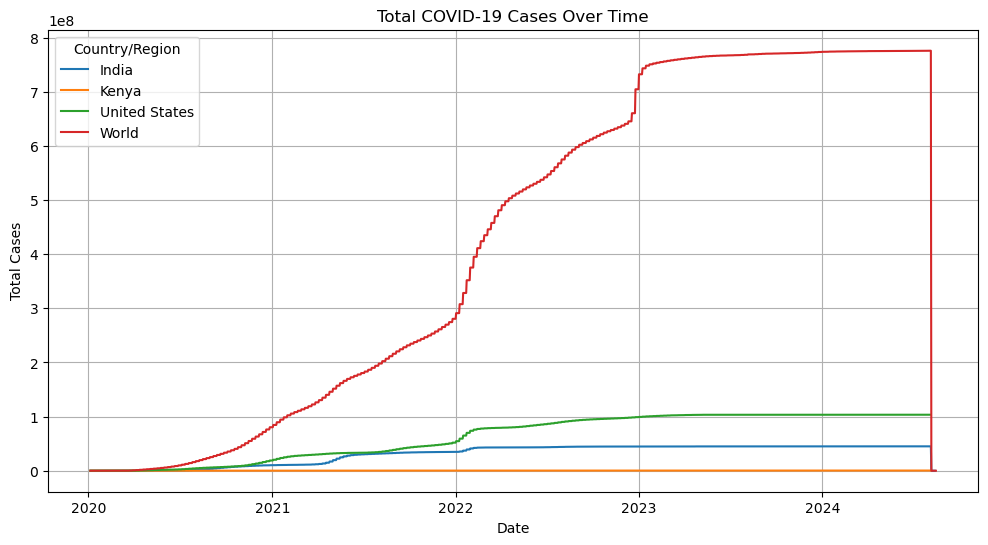

In [6]:
# --- 3. Exploratory Data Analysis (EDA) ---
print("\n--- 3. Exploratory Data Analysis (EDA) ---")

# 3.1. Plot total cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Country/Region')
plt.grid(True)
plt.show()


--- 3. Exploratory Data Analysis (EDA) ---


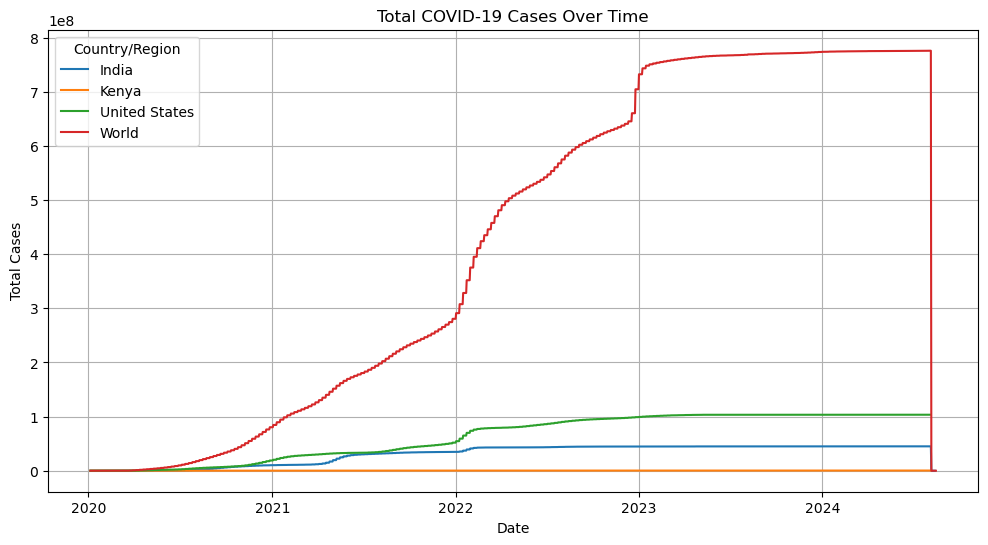

In [7]:
# --- 3. Exploratory Data Analysis (EDA) ---
print("\n--- 3. Exploratory Data Analysis (EDA) ---")

# 3.1. Plot total cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Country/Region')
plt.grid(True)
plt.show()

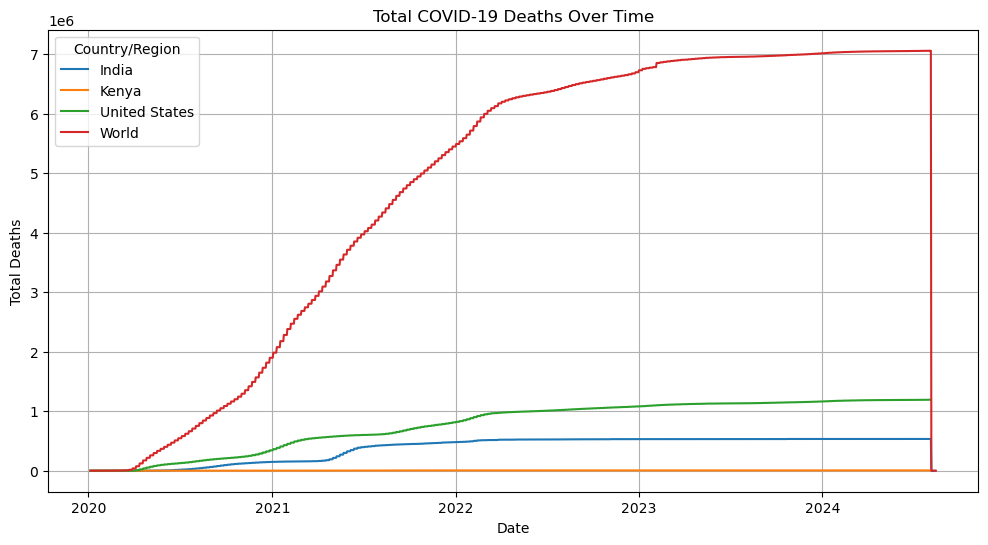

In [8]:
# 3.2. Plot total deaths over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='total_deaths', hue='location')
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend(title='Country/Region')
plt.grid(True)
plt.show()

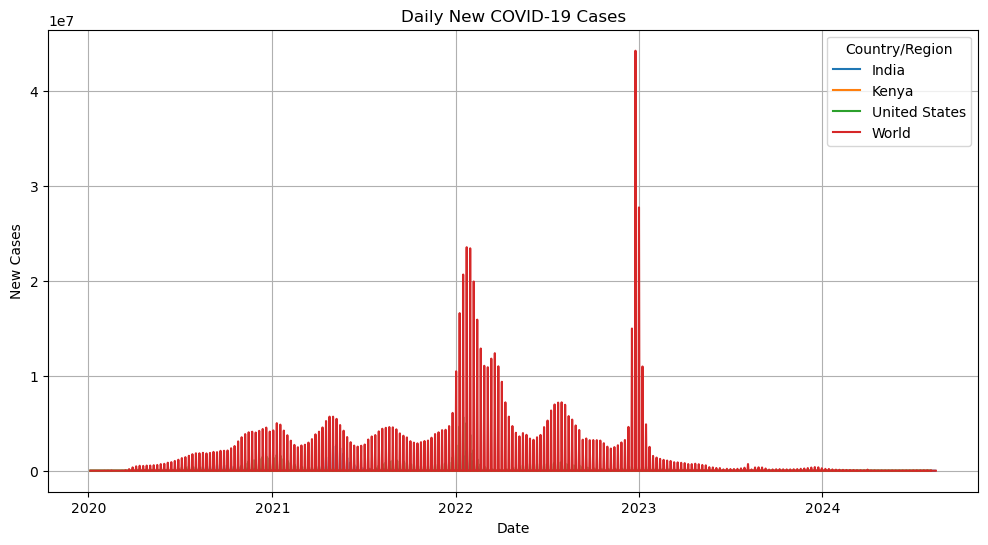

In [9]:
# 3.3. Compare daily new cases between countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='new_cases', hue='location')
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(title='Country/Region')
plt.grid(True)
plt.show()


In [12]:
# 3.4. Calculate and explore the death rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
# Replace infinite values with 0 if total_cases is 0
df_filtered['death_rate'] = df_filtered['death_rate'].replace([float('inf'), float('nan')], 0)